In [305]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

# %matplotlib inline
# from __future__ import division
import pandas as pd
from IPython.display import Image

<b>QUESTION 1</b>

<B>Feedforward: Building a ReLU neural network<B>
    
Consider the rectified linear activation function : hj = max(0, aj ).


<b> 1.1 <b>    
Draw a network with:
    
• 2 inputs
• 1 hidden layers with 4 hidden units and a
• 1-class output (for binary classification)

Please find it as another attachment 

<b> 1.2 <b>
    
Write out the mathematical equation for the output of this network (feel
free to break the input-output relationship into multiple equations)

Please find it as another attachment

<b> 1.3 <b>
    
Write out the forward-pass function in python, call it ff nn ReLu(...)
    

In [306]:
# ADDING A BASIC RELU AND SIGMOID OUTPUT FUNCTION
def ReLu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [307]:
# FORWARD-PASS FUNCTION CALLING IT THE FOLLOWING:
def ff_nn_Relu(W, X, b, V, c):
    XW = np.dot(X,W) + b
    XW[XW <= 0] = 0
    output  = np.dot(XW, V) + c
    y = 1. / (1 + np.exp(-output))
    return y

<b> 1.4 <b> 
what are the class probabilities associated with the forward pass of each
sample?

In [308]:
# VARIABLES THAT ARE GIVEN TO US.
X = np.array([[1, -1], [0, -1], [0, 1]])
W = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
V = np.array([1, 0, -1, 1])
c = np.array([1])

In [309]:
# USING THE FUNCTION WE CODED IN 1.3
FINAL= ff_nn__ReLu(X, W, b, V, c)

In [310]:
print("The Class Probabilities are as Follows:" + str(FINAL[0])+', '+str(FINAL[1])+' and '+str(FINAL[2]))

The Class Probabilities are as Follows:0.8175744761936437, 0.6224593312018546 and 0.6224593312018546


<b> QUESTION 2 <b>

Consider a simple non-convex function of two variables:
$$f(x, y) = (3 - x^3) + 50 * (2y^2 - x)^2$$

<b> 2.1 <b>    
What are the partial derivatives of f with respect to x and to y?

The partial derivative of f with respect to x<p>
$$
{\partial f \over \partial x} = -3x^2-100(2y^2-x)
$$

The partial derivative of f with respect to y<p>
$$
{\partial f \over \partial y} = 400y(2y^2-x)
$$

<b> 2.2 <b>
Create a visualization of the contours of this function.

In [311]:
xandy= lambda x,y : (3-x**3)+50*(2*y**2-x)**2

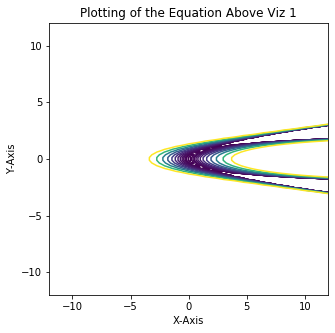

In [312]:
# PLOTTING THE ABOVE USING THE CONTOUR CODE
X,Y = np.meshgrid(np.linspace(-12,12,100), np.linspace(-12,12,100))

fig1 = xandy (X,Y)

plt.figure(figsize = (5,5))
plt.contour(X,Y,fig1,np.logspace(-1,4,20,40, base=5)) # HAD TO PLAY AROUND WITH THE NUMBERS TO MAKE SURE I HAD A CLEAR VIZ.

plt.title('Plotting of the Equation Above Viz 1')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

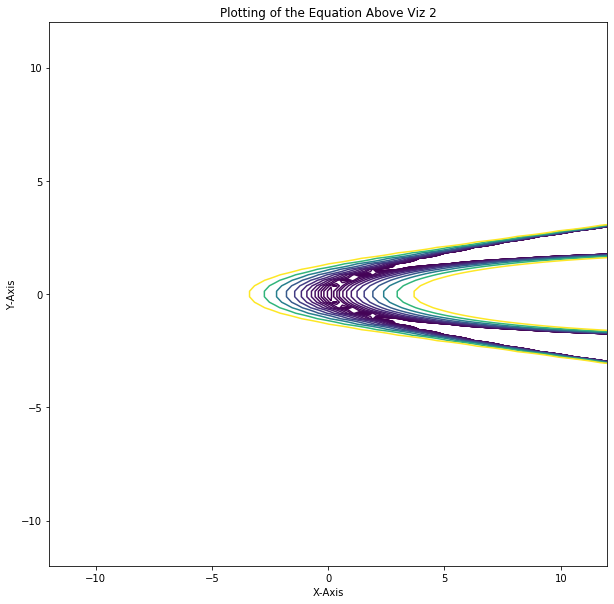

In [313]:
# PLOTTING THE ABOVE USING THE CONTOUR CODE. A MORE ZOOMED IN VERSION.
X,Y = np.meshgrid(np.linspace(-12,12,100), np.linspace(-12,12,100))

fig1 = xandy (X,Y)

plt.figure(figsize = (10,10))
plt.contour(X,Y,fig1,np.logspace(-1,4,20,40, base=5)) # HAD TO PLAY AROUND WITH THE NUMBERS TO MAKE SURE I HAD A CLEAR VIZ.

plt.title('Plotting of the Equation Above Viz 2')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

<b> 2.3 <b>
Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates

In [314]:
# THE PARTIAL DERIVATIVE FUNCTION
def partial_func(vector):
    x, y = vector
    df_dx = -3*x**2-100*(2*y**2-x)
    df_dy = 400*y*(2*y**2-x)
    return np.array([df_dx, df_dy])

In [315]:
def grad_descent(starting_point=None, iterations=100, learning_rate=0.0001):
    if starting_point is None:
        point= np.random.uniform(-10,10, size=2)
    else:
        point= starting_point 
    trajectory= [point]
    
    for i in range (iterations):
        grad= grad_f(point)
        point=point-learning_rate* grad
        trajectory.append(point)
        
    return np.array(trajectory)

In [316]:
# TESTING MULTIPLE TRAJECTORIES
np.random.seed(10)
test1 = gradient_descent()
np.random.seed(10)
test2 = gradient_descent(learning_rate = 0.004)
np.random.seed(10)
test3 = gradient_descent(learning_rate = 0.006)
np.random.seed(10)
test4 = gradient_descent(learning_rate = 0.008)
np.random.seed(10)
test5 = gradient_descent(learning_rate = 0.009)
np.random.seed(10)
test6 = gradient_descent(learning_rate = 0.010)

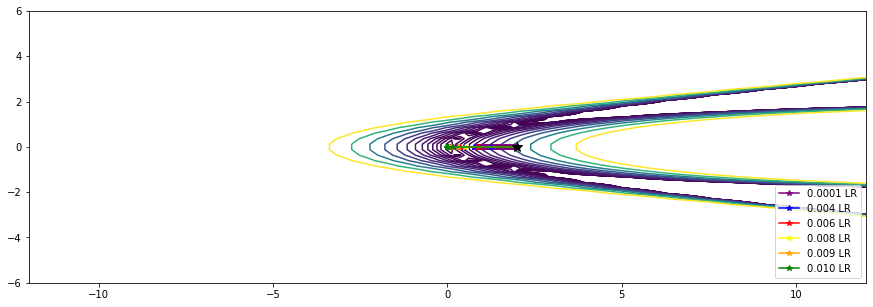

In [317]:
# PLOTTING BY UING THE CONTOUR FUNCTION AND ADDING TO THE LAB CODE
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlim([-12, 12])
ax.set_ylim([-6,6])
CS = ax.contour(X,Y,fig1,np.logspace(-1,4,20,40, base=5))
plt.plot(test1[:,0], test1[:,1], '-*', color = 'purple', label = '0.0001 LR')
plt.plot(test2[:,0], test2[:,1], '-*', color = 'blue', label = '0.004 LR')
plt.plot(test3[:,0], test3[:,1], '-*', color = 'red', label = '0.006 LR')
plt.plot(test4[:,0], test4[:,1], '-*', color = 'yellow', label = '0.008 LR')
plt.plot(test5[:,0], test5[:,1], '-*', color = 'orange', label = '0.009 LR')
plt.plot(test6[:,0], test6[:,1], '-*', color = 'green', label = '0.010 LR')
plt.plot(2, 0, "*", color = 'black', markersize = 10)
plt.legend(loc = 'lower right')

<b> 2.4 <b>
Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s
hyperparameters.

In [318]:
def grad_descent_with_momentum(starting_point=None, iterations=10, epsilon=0.9, alpha = 10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.array([2,0])

    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

In [230]:
np.random.seed(10)
test7 = grad_descent_with_momentum(iterations=100, epsilon=0.0005, alpha=0.5)
np.random.seed(10)
test8 = grad_descent_with_momentum(iterations=100, epsilon=0.0006, alpha=0.05)
np.random.seed(10)
test9 = grad_descent_with_momentum(iterations=100, epsilon=0.0004, alpha=1)
np.random.seed(10)
test10 = grad_descent_with_momentum(iterations=100, epsilon=0.005, alpha=0.6)

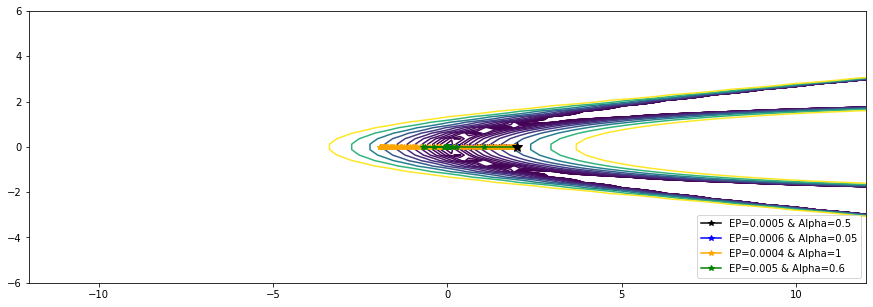

In [319]:
# PLOTTING BY UING THE CONTOUR FUNCTION AND ADDING TO THE LAB CODE
fig, ax = plt.subplots(figsize = (15,5))
ax.set_xlim([-12, 12])
ax.set_ylim([-6,6])
CS = ax.contour(X,Y,fig1,np.logspace(-1,4,20,40, base=5))
plt.plot(test7[:,0], test7[:,1], '-*', color = 'black', label = 'EP=0.0005 & Alpha=0.5')
plt.plot(test8[:,0], test8[:,1], '-*', color = 'blue', label = 'EP=0.0006 & Alpha=0.05')
plt.plot(test9[:,0], test9[:,1], '-*', color = 'orange', label = 'EP=0.0004 & Alpha=1')
plt.plot(test10[:,0], test10[:,1], '-*', color = 'green', label = 'EP=0.005 & Alpha=0.6')
plt.plot(2, 0, "*", color = 'black', markersize = 10)
plt.legend(loc = 'lower right')

<b> QUESTION 3 <B>
   

<B> 3.1 <B>
For the same network as in Question 1, derive expressions of the gradient
of the Loss function with respect to each of the model parameters.

Please find as an attachment.

<b> 3.2 <b>
Write a function grad f(...) that takes in a weights vector and returns
the gradient of the Loss at that location

In [320]:
# BASIC SIGMOID OUTPUT FUNCTION
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [321]:
# GRAD_F FUNCTION.
def grad_f(y,x,w,b,v,c):
    h = np.dot(w.T,x)+b
    a = np.where(h<0,0,h)
    z = np.dot(a.T,v)+c
    yhat = sigmoid(z)
    
    #WHERE WE HAVE TO CODE THE FOLLOWING:
    c = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)
    v = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)*a
    w = np.zeros(shape=(2,4))
    b = np.zeros(shape=(1,4))
    
    
    for j in range(0,4):
        if h[j]<0:
            w[j][0] = w[j][1] =b[j]=0
            
        else:
            w[j] = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)*v[j]*x
            b[j] = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)*v[j]
            
    return c,v,w.T,b.T

In [359]:
w = np.array([[1,-1,0,1],[0,0,0.5,1]])
b = np.array([0,0,1,0])
v = np.array([1,0,-1,1])
c = np.array([1])
x = np.array([1,-1])
c,v,w =  grad_f(1,x,w,b,v,c)

ValueError: could not broadcast input array from shape (2) into shape (4)

In [323]:
c,v,w,b

(array([1]), array([ 1,  0, -1,  1]), array([[ 1. , -1. ,  0. ,  1. ],
        [ 0. ,  0. ,  0.5,  1. ]]), array([0, 0, 1, 0]))

<b> 3.3 <b>
Generate a synthetic dataset like the XOR pattern (see below).

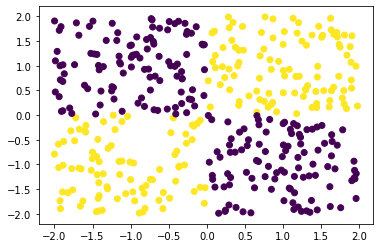

In [334]:
N=400
np.random.seed(1)
x1 = np.random.uniform(-2,2,N*2).reshape(N,2)
z=[1]*N
for i in range(0,N):
    if x1[i][0]*x1[i][1]<0:
        z[i] = 0
plt.scatter(x1[:,0],x1[:,1],c=z)

<b> 3.4 <b>
Fit your network using Gradient Descent. Keep track of the total Loss at
each iteration and plot the result.

In [329]:
def forward(y,x,w,b,v,c):
    z1 = np.dot(w.T,x)+b
    a1 = np.where(z1<0,0,z1)
    z2 = np.dot(a1.T,v)+c
    a2 = sigmoid(z2)
            
    return z1,a1,z2,a2

In [330]:
def loss(y,yhat):
    return -y*np.log(yhat)-(1-y)*np.log(1-yhat)

In [331]:
def gradient_ann(y,X,w,b,v,c,lr,iterations):

    losses= []    
    for i in range(0,iterations):        
        dw = np.zeros(shape=(4,2))
        db = np.zeros(shape=(4))
        dc = 1
        dv = np.zeros(shape=(4))      
        
        sumloss = 0
        y_hat = [] 
        
        
        for m in range(0,len(y)):
            
           
            h,a,z,yhat = forward(y[m],X[m],w,b,v,c)
            
            sumloss += loss(y[m],yhat)
            

            dv += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*a

            
            dc += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)

            
            for j in range(0,3):
                if h[j]>0:
                    dw[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]*X[m]
                    db[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]
            
           
            y_hat.append(yhat)
        
       
        losses.append(sumloss)
        
        
        w = w-lr*dw.T/len(y)
        v = v-lr*dv/len(y)
        c= c-lr*dc/len(y)
        b= b-lr*db/len(y)
       
    return losses,y_hat

Text(0, 0.5, 'Loss')

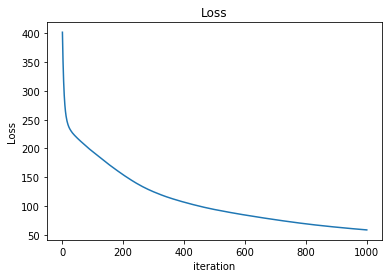

In [337]:
np.random.seed(1)
w = np.random.randn(8).reshape((2,4))
b = np.random.randn(4).reshape(4)
v = np.random.randn(4).reshape(4)
c=np.random.randn(1)
y = [1]*N
for i in range(0,N):
    if z[i]==1:
        y[i]=0
lr = 0.1
iterations=1000
losses,yhat =  gradient_ann(y,x1,w,b,v,c,lr,iterations)
plt.plot(np.arange(1,iterations+1),losses)
plt.title('Loss')
plt.xlabel('iteration')
plt.ylabel('Loss')

<b> 3.5 <b>
Repeat the exercise above using Momentum. Comment on whether your
algorithm seems to converge more efficiently.

In [353]:
def gradient_momentum(y,X,w,b,v,c,alpha,eps,iterations):
    losses= []
    
    
    dwnew = np.zeros(shape=(4,2))
    dbnew = np.zeros(shape=(4))
    dcnew = 1
    dvnew = np.zeros(shape=(4))  
    
    
    for i in range(0,iterations):
        
        dw = np.zeros(shape=(4,2))
        db = np.zeros(shape=(4))
        dc = 1
        dv = np.zeros(shape=(4))
        
        
        sumloss = 0
        y_hat = []
        for m in range(0,len(y)):
            
            h,a,z,yhat = forward(y[m],X[m],w,b,v,c)
            sumloss += loss(y[m],yhat)
            
            dv =dv+(-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*a

           
            dc =dc+((-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat))


            for j in range(0,3):
                if h[j]>0:
                    dw[j] =dw[j]+ ((-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]*X[m])
                    db[j] =db[j]+ ((-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j])

            y_hat.append(yhat)
        
        losses.append(sumloss)
        
        
        dwnew = alpha*dwnew+eps*dw/len(y)
        dvnew = alpha*dvnew+eps*dv/len(y)
        dcnew = alpha*dcnew+eps*dc/len(y)
        dbnew = alpha*dbnew+eps*db/len(y)
        
        
        w = w-dwnew.T
        v = v-dvnew
        c= c-dcnew
        b= b-dbnew
        
        
    return losses,y_hat

In [354]:
eps=lr
alpha=0.5

losses2,yhat2 =  gradient_momentum(y,x1,w,b,v,c,alpha,eps,iterations)

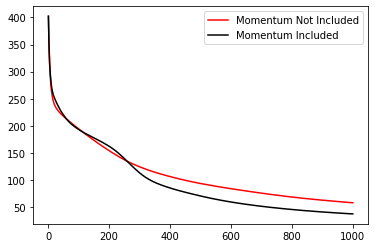

In [356]:
plt.plot(np.arange(1,iterations+1),losses,label='Momentum Not Included', color= 'red')
plt.plot(np.arange(1,iterations+1),losses2,label='Momentum Included',color = 'black')
plt.legend()

<b> 3.6 <b>
Plot a visualization of the final decision boundary that your model has
learned. Overlay the datapoints in this plot.

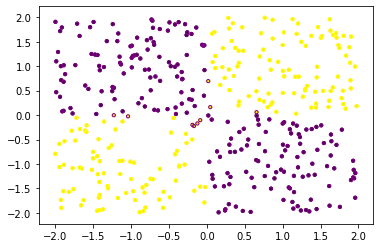

In [357]:
z=[1]*N
for i in range(0,N):
    if x1[i][0]*x1[i][1]<0:
        z[i] = 0
plt.scatter(x1[:,0],x1[:,1],c=z,s = 10)
yclass2=['purple']*N
for i in range(0,N):
    if yhat2[i]<0.5:
        yclass2[i]= 'yellow'
plt.scatter(x1[:,0],x1[:,1],c='', marker = 'o',edgecolors = yclass2, s=10)